# In this code we used PPG_FIELD dataset which includes 8 activities
## 1: "Sitting", 2: "Stairs", 3: "Soccer", 4: "Cycling", 5: "Driving", 6: "Lunch", 7: "Walking", 8: "Working" (For more details: https://archive.ics.uci.edu/ml/datasets/PPG-DaLiA)

## We converted the activites to only two lables 0 and 1. 0 includes any activity that doesn't require any movemnet and 1 includes and activity with movemnet.

## Final lables 0: "Sitting", "Lunch", "Working" and 1: "Stairs", "Soccer", "Cycling", "Driving".

## The dataset includes E4 wristband signals 'ACC_x', 'ACC_y', 'ACC_z', 'TEMP', 'EDA', 'BVP', 'ACC_Magnitude', 'SUBJECT ID', 'Activity'

# Part 1: Data exploratory

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns

In [ ]:
df = pd.read_csv('data_final.csv')
df

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,Magnitude,wrist_BVP,wrist_TEMP,wrist_EDA,Activity,Subject
0,-0.671875,0.500000,-0.031250,0.838089,52.95,33.47,5.035345,8,S1
1,-0.843750,0.703125,0.125000,1.105407,107.33,33.49,5.036625,8,S1
2,-0.437500,0.734375,0.328125,0.915630,166.30,33.49,4.999472,8,S1
3,-0.562500,0.515625,0.250000,0.802979,-165.69,33.49,4.966161,8,S1
4,-0.546875,0.578125,0.250000,0.834147,-65.76,33.49,4.936694,8,S1
...,...,...,...,...,...,...,...,...,...
517951,-0.468750,0.859375,0.093750,0.983382,1.68,33.99,0.000000,0,S15
517952,-0.609375,0.890625,0.265625,1.111354,-16.38,33.99,0.000000,0,S15
517953,-0.468750,0.531250,-0.562500,0.904632,13.43,33.99,0.000000,0,S15
517954,-0.375000,0.406250,-0.843750,1.008751,-5.89,33.99,0.000000,0,S15


In [ ]:
df.describe()

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,Magnitude,wrist_BVP,wrist_TEMP,wrist_EDA,Activity
count,517956.000000,517956.000000,517956.000000,517956.000000,517956.000000,517956.000000,517956.000000,517956.000000
mean,-0.523311,0.100442,0.356042,1.036891,0.042157,33.068502,0.388140,3.835615
std,0.350997,0.644760,0.405099,0.196428,83.879339,1.812486,1.607082,2.979353
min,-2.000000,-2.000000,-2.000000,0.034939,-1581.680000,26.270000,0.000000,0.000000
25%,-0.796875,-0.343750,0.109375,0.982389,-31.350000,31.810000,0.000000,0.000000
50%,-0.515625,-0.015625,0.343750,1.006085,2.730000,33.500000,0.000000,5.000000
75%,-0.281250,0.640625,0.687500,1.050251,33.870000,34.340000,0.000000,6.000000
max,1.984375,1.984375,1.984375,3.464102,1806.390000,36.450000,17.872803,8.000000


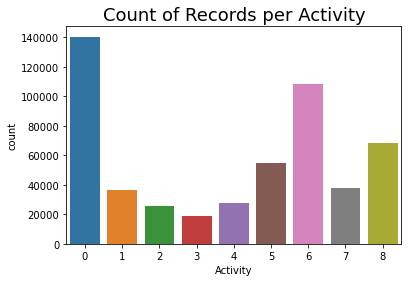

In [ ]:
plt.ylabel("Number of Records")
plt.xlabel("Activity")
plt.title("Count of Records per Activity", size = 18)

ax = sns.countplot(x="Activity", data=df)
plt.show()

In [ ]:
df = df[df.Activity != 0]
df

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,Magnitude,wrist_BVP,wrist_TEMP,wrist_EDA,Activity,Subject
0,-0.671875,0.500000,-0.031250,0.838089,52.95,33.47,5.035345,8,S1
1,-0.843750,0.703125,0.125000,1.105407,107.33,33.49,5.036625,8,S1
2,-0.437500,0.734375,0.328125,0.915630,166.30,33.49,4.999472,8,S1
3,-0.562500,0.515625,0.250000,0.802979,-165.69,33.49,4.966161,8,S1
4,-0.546875,0.578125,0.250000,0.834147,-65.76,33.49,4.936694,8,S1
...,...,...,...,...,...,...,...,...,...
377619,-0.906250,-0.140625,0.421875,1.009477,-7.01,31.21,0.000000,1,S15
377620,-0.906250,-0.140625,0.421875,1.009477,18.29,31.21,0.000000,1,S15
377621,-0.921875,-0.156250,0.421875,1.025790,-1.42,31.21,0.000000,1,S15
377622,-0.921875,-0.156250,0.421875,1.025790,-6.51,31.23,0.000000,1,S15


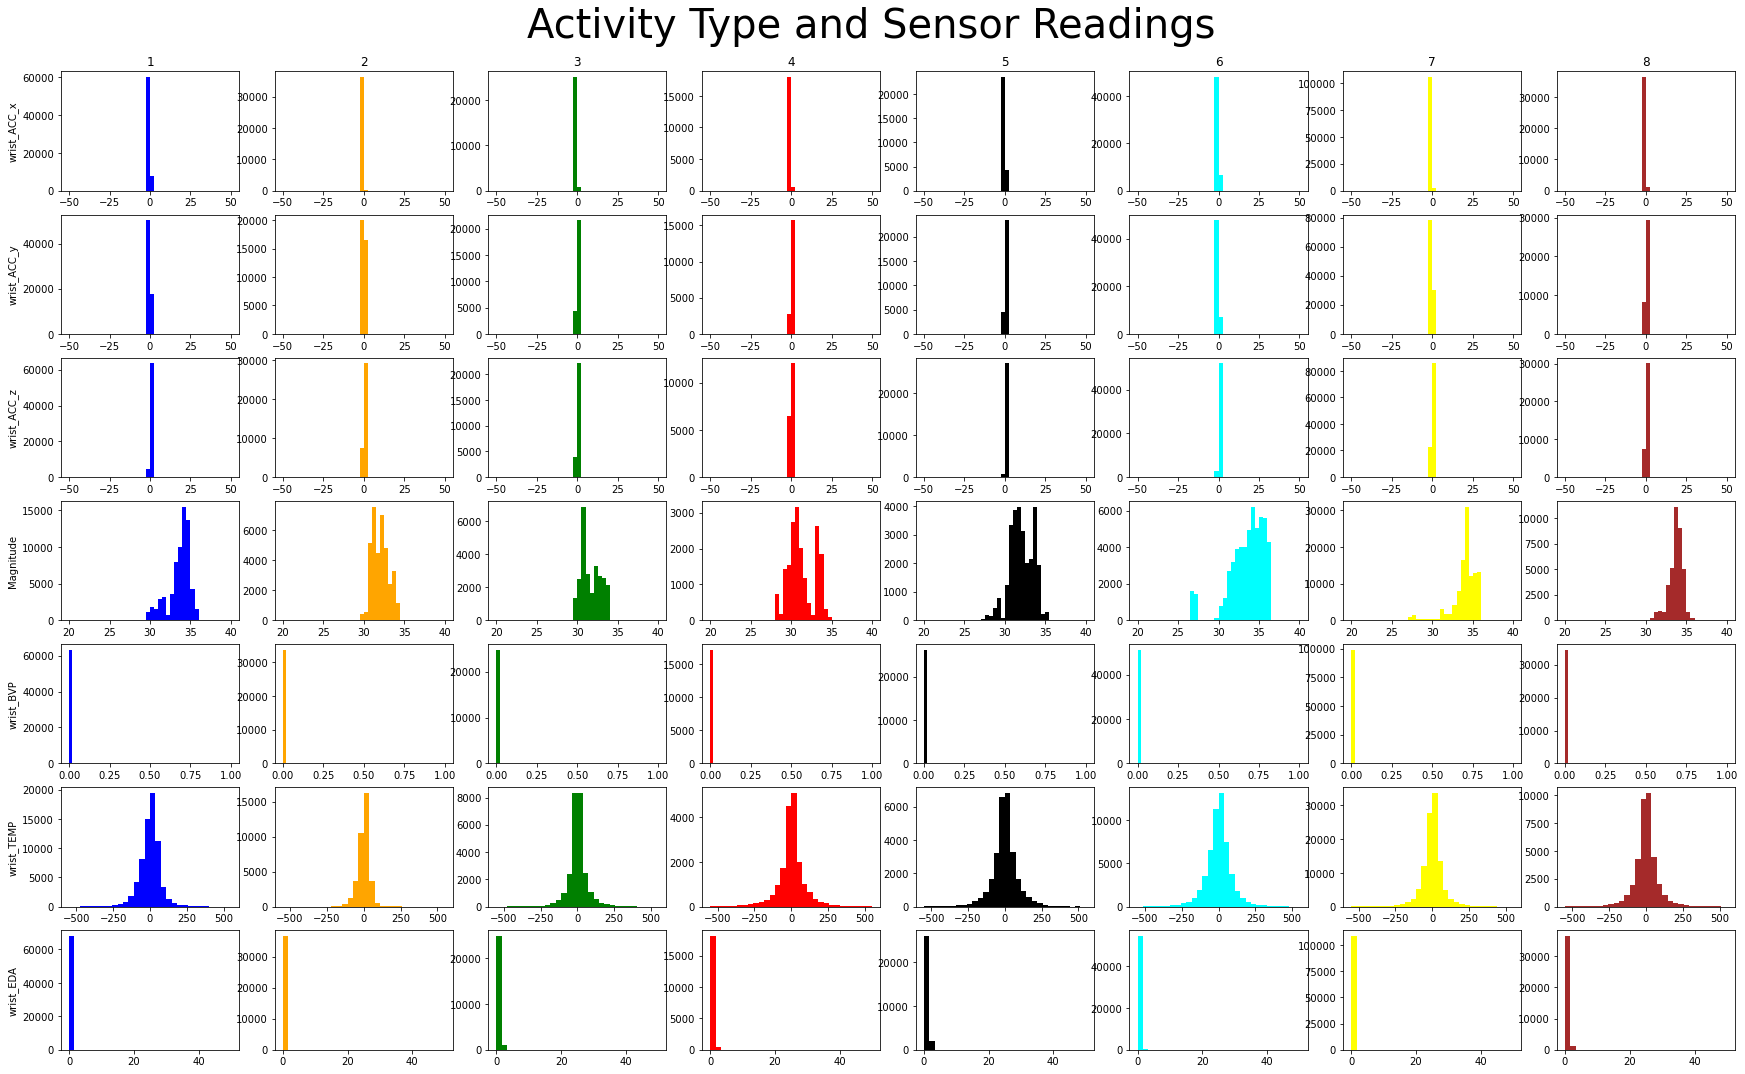

In [ ]:
ac_list = [1,2,3,4,5,6,7,8]
sense_list = ['wrist_ACC_x','wrist_ACC_y','wrist_ACC_z','Magnitude','wrist_BVP','wrist_TEMP','wrist_EDA']

nrows = 7
ncols = 8
fig, ax = plt.subplots(nrows, ncols, figsize = (30,18))
colors = ['Blue','Orange','Green','Red','Black','cyan','yellow','brown']
for j in range(ncols):
    dfw = df[df["Activity"] == ac_list[j-1]]
    color = colors[j]
    for i in range(nrows):
        if i == 0:
            ax[i,j].hist(dfw["wrist_ACC_x"],40, range = [-50, 50], color = color)
        elif i == 1:
            ax[i,j].hist(dfw['wrist_ACC_y'], 40, range = [-50, 50], color = color)
        elif i == 2:
            ax[i,j].hist(dfw['wrist_ACC_z'], 40, range = [-50, 50], color = color)
        elif i == 3:
            ax[i,j].hist(dfw['wrist_TEMP'], 40, range = [20, 40], color = color)
        elif i == 4:
            ax[i,j].hist(dfw['wrist_EDA'], 50, range = [0, 1], color = color)
        elif i == 5:
            ax[i,j].hist(dfw['wrist_BVP'], 30, range = [-550, 550], color = color)
        else:
            ax[i,j].hist(dfw['Magnitude'], 30, range = [0, 50], color = color)

for i in range(ncols):
    ax[0,i].set_title(ac_list[i])

for j in range(nrows):
    ax[j,0].set(ylabel = sense_list[j])

plt.suptitle("Activity Type and Sensor Readings", size = 40, y = 0.93)
plt.show()

# Part 2: Feature engineering

In [ ]:
df['Activity'].replace([1,5,6,8], 0, inplace=True)
df['Activity'].replace([2,3,4,7], 1, inplace=True)

C:\Users\14379\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
from window_slider import Slider

def make_windows(df, bucket_size, overlap_count):
    window_list = []
    final = pd.DataFrame()
    activity_list = list(df['Activity'].unique()) #list of the four activities
    sub_id_list = list(df['Subject'].unique()) #list of the subject ids # ['s1','s2',.....'s15']
    df_list = []


    for i in sub_id_list:
        df_subject = df[df['Subject'] == i] #isolate a single subject id
        for j in activity_list:
            df_subject_activity = df_subject[df_subject['Activity'] == j] #isolate by activity
            final_df = pd.DataFrame()
            if df_subject_activity.empty:
                  pass
            else:
                df_flat = df_subject_activity[['wrist_ACC_x','wrist_ACC_y','wrist_ACC_z','wrist_BVP','wrist_TEMP','wrist_EDA','Magnitude', 'Subject']].T.values #array of arrays, each row is every single reading in an array for a sensor in that isolation

                slider = Slider(bucket_size,overlap_count)
                slider.fit(df_flat)
                while True:
                    window_data = slider.slide()

                    if slider.reached_end_of_list(): break
                    window_list.append(list(window_data))
                final_df = final.append(window_list)
                final_df.columns = [['ACC1', 'ACC2','ACC3','TEMP','EDA','BVP','Magnitude', 'SID']]
                final_df.insert(8, "Subject", [i]*len(final_df), True)
                final_df.insert(9, "Activity", [j]*len(final_df), True)
                df_list.append(final_df)
                window_list = []

    final = pd.DataFrame(columns = df_list[0].columns)

    for l in df_list:
        final = final.append(l)


    final
    final.columns = final.columns.map(''.join)
    return final

In [ ]:
df

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,Magnitude,wrist_BVP,wrist_TEMP,wrist_EDA,Activity,Subject
0,-0.671875,0.500000,-0.031250,0.838089,52.95,33.47,5.035345,0,S1
1,-0.843750,0.703125,0.125000,1.105407,107.33,33.49,5.036625,0,S1
2,-0.437500,0.734375,0.328125,0.915630,166.30,33.49,4.999472,0,S1
3,-0.562500,0.515625,0.250000,0.802979,-165.69,33.49,4.966161,0,S1
4,-0.546875,0.578125,0.250000,0.834147,-65.76,33.49,4.936694,0,S1
...,...,...,...,...,...,...,...,...,...
377619,-0.906250,-0.140625,0.421875,1.009477,-7.01,31.21,0.000000,0,S15
377620,-0.906250,-0.140625,0.421875,1.009477,18.29,31.21,0.000000,0,S15
377621,-0.921875,-0.156250,0.421875,1.025790,-1.42,31.21,0.000000,0,S15
377622,-0.921875,-0.156250,0.421875,1.025790,-6.51,31.23,0.000000,0,S15


In [ ]:
df = make_windows(df, 80, 40)

## Create engineered dataframes
## Protocol:

### Copy windowed dataframe (df)
### Apply feature engineering algorithm to df1
### Copy df1
### Change column names to represent new feature


## Mean

In [ ]:
df1 = df.copy()
for j in df1[['ACC1', 'ACC2', 'ACC3', 'TEMP', 'EDA', 'BVP', 'Magnitude']].columns:
    df1[j] = df1[j].map(lambda x: np.mean(x))
dfmean = df1.copy()
dfmean.columns = dfmean.columns+"_mean"
dfmean

,ACC1_mean,ACC2_mean,ACC3_mean,TEMP_mean,EDA_mean,BVP_mean,Magnitude_mean,SID_mean,Subject_mean,Activity_mean
0,-0.673047,0.194531,0.421289,-4.981125,33.482000,5.245454,1.025413,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
1,-0.843945,-0.204883,0.509570,1.940625,33.469375,4.891332,1.017780,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
2,-0.841211,-0.293945,0.487695,-0.261125,33.468250,4.852172,1.016169,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
3,-0.710938,-0.243750,0.607031,3.129125,33.442000,4.879830,1.007804,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
4,-0.508789,-0.144727,0.787500,2.703750,33.417000,4.793671,1.005743,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
...,...,...,...,...,...,...,...,...,...,...
121,-0.334570,0.933984,0.269336,0.243500,32.018625,0.000000,1.048405,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
122,-0.382812,0.913867,0.260156,0.064000,32.004000,0.000000,1.053121,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
123,-0.424805,0.919141,0.276758,0.678000,31.995875,0.000000,1.084456,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
124,-0.389648,0.940625,0.253125,0.565375,31.985375,0.000000,1.084145,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1


## Standard deviation

In [ ]:

df1 = df.copy()
for j in df1[['ACC1', 'ACC2', 'ACC3', 'TEMP', 'EDA', 'BVP', 'Magnitude']].columns:
    df1[j] = df1[j].map(lambda x: np.std(x))
dfstd = df1.copy()
dfstd.columns = dfstd.columns + '_std'
dfstd

,ACC1_std,ACC2_std,ACC3_std,TEMP_std,EDA_std,BVP_std,Magnitude_std,SID_std,Subject_std,Activity_std
0,0.315685,0.444564,0.306669,154.110035,0.012884,0.284778,0.090481,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
1,0.060591,0.120904,0.065852,79.913720,0.016458,0.275157,0.025143,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
2,0.010610,0.016773,0.019088,44.757517,0.017662,0.253404,0.006690,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
3,0.207495,0.092919,0.180469,140.906219,0.038936,0.232664,0.043842,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
4,0.233277,0.112341,0.217106,170.387278,0.023896,0.130772,0.051209,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
...,...,...,...,...,...,...,...,...,...,...
121,0.142644,0.254320,0.137070,41.618577,0.015227,0.000000,0.247926,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
122,0.189990,0.272173,0.148090,36.325588,0.016553,0.000000,0.269110,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
123,0.219906,0.256861,0.179112,29.993722,0.015305,0.000000,0.268786,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
124,0.200636,0.254049,0.181905,31.791328,0.017388,0.000000,0.251372,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1


## Skew

In [ ]:
df1 = df.copy()
for j in df1[['ACC1', 'ACC2', 'ACC3', 'TEMP', 'EDA', 'BVP', 'Magnitude']].columns:
    df1[j] = df1[j].map(lambda x: stats.skew(x))
dfskew = df1.copy()
dfskew.columns = dfskew.columns+"_skew"
dfskew

,ACC1_skew,ACC2_skew,ACC3_skew,TEMP_skew,EDA_skew,BVP_skew,Magnitude_skew,SID_skew,Subject_skew,Activity_skew
0,1.421344,0.723384,-1.347881,-0.300174,-0.656455,0.318812,0.819921,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
1,1.102716,0.988112,1.653009,1.113278,-0.438426,0.549396,2.584749,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
2,-0.212629,1.441149,-1.027643,-0.527622,-0.264453,0.765591,-0.041984,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
3,0.984661,1.418133,0.890502,-0.033118,-0.120352,0.853521,-0.759541,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
4,-0.946037,-0.127024,-1.285804,-0.027046,0.356630,0.216965,-0.414401,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
...,...,...,...,...,...,...,...,...,...,...
121,-0.464621,0.708901,-0.093886,0.080687,-0.638288,0.000000,0.579015,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
122,-0.304212,0.566796,0.966789,-0.001076,0.407452,0.000000,0.653747,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
123,-0.372071,0.198963,0.418419,0.254012,0.378349,0.000000,0.499843,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
124,-0.676077,0.161065,-0.492273,0.076769,0.329367,0.000000,0.391184,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1


## Minimum

In [ ]:

df1 = df.copy()
for j in df1[['ACC1', 'ACC2', 'ACC3', 'TEMP', 'EDA', 'BVP', 'Magnitude']].columns:
    df1[j] = df1[j].map(lambda x: np.min(x))
dfmin = df1.copy()
dfmin.columns = dfmin.columns+"_min"
dfmin

,ACC1_min,ACC2_min,ACC3_min,TEMP_min,EDA_min,BVP_min,Magnitude_min,SID_min,Subject_min,Activity_min
0,-1.109375,-0.265625,-0.734375,-629.89,33.45,4.814682,0.802979,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
1,-1.109375,-0.312500,0.359375,-221.07,33.43,4.548197,0.940360,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
2,-0.859375,-0.312500,0.421875,-92.72,33.43,4.548197,1.001586,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
3,-1.109375,-0.328125,0.375000,-428.70,33.39,4.596882,0.843461,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
4,-1.109375,-0.328125,0.093750,-428.70,33.39,4.596882,0.843461,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
...,...,...,...,...,...,...,...,...,...,...
121,-0.734375,0.484375,-0.062500,-93.86,31.99,0.000000,0.630251,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
122,-0.968750,0.343750,-0.015625,-93.86,31.97,0.000000,0.586510,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
123,-1.031250,0.343750,-0.140625,-63.48,31.97,0.000000,0.586510,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
124,-1.031250,0.375000,-0.250000,-61.43,31.95,0.000000,0.608573,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1


## Maximum

In [ ]:

df1 = df.copy()
for j in df1[['ACC1', 'ACC2', 'ACC3', 'TEMP', 'EDA', 'BVP',  'Magnitude']].columns:
    df1[j] = df1[j].map(lambda x: np.max(x))
dfmax = df1.copy()
dfmax.columns = dfmax.columns+"_max"
dfmax

,ACC1_max,ACC2_max,ACC3_max,TEMP_max,EDA_max,BVP_max,Magnitude_max,SID_max,Subject_max,Activity_max
0,0.328125,1.109375,1.093750,590.59,33.50,5.797645,1.401468,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
1,-0.531250,0.062500,0.812500,384.81,33.50,5.440197,1.171041,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
2,-0.828125,-0.250000,0.515625,61.08,33.49,5.415554,1.032906,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
3,-0.234375,0.078125,0.984375,469.46,33.49,5.415554,1.185957,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
4,-0.234375,0.078125,1.000000,469.46,33.47,5.041451,1.185957,"[S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S1, S...",S1,0
...,...,...,...,...,...,...,...,...,...,...
121,-0.046875,1.671875,0.625000,100.65,32.03,0.000000,1.689452,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
122,0.109375,1.671875,0.890625,82.88,32.03,0.000000,1.825786,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
123,0.109375,1.531250,0.890625,71.97,32.03,0.000000,1.825786,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1
124,0.062500,1.546875,0.656250,71.97,32.03,0.000000,1.748604,"[S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S6, S...",S6,1


## Concatenate engineered dataframes

In [ ]:
df_list = [dfmean, dfstd, dfskew, dfmin, dfmax]
df_list = [dfmean, dfstd, dfskew, dfmin, dfmax]
df1 = df.drop(['SID'], axis = 1)
df1 = pd.concat([df1, dfmean.iloc[:, :8]], axis = 1)
df1 = pd.concat([df1, dfstd.iloc[:, :8]], axis = 1)
df1 = pd.concat([df1, dfskew.iloc[:, :8]], axis = 1)
df1 = pd.concat([df1, dfmin.iloc[:, :8]], axis = 1)
df1 = pd.concat([df1, dfmax.iloc[:, :8]], axis = 1)
engineered_features
df1.to_csv('engineered_features.csv', index = False)

# Part 3: Machine learning with and without feautere engineering

##  Part 3-A: Machine learning without feautere engineering


In [ ]:
remove = ["Subject", "Activity"]
features = [column for column in list(df.columns) if column not in remove]
features

['wrist_ACC_x',
 'wrist_ACC_y',
 'wrist_ACC_z',
 'Magnitude',
 'wrist_BVP',
 'wrist_TEMP',
 'wrist_EDA']

In [ ]:
#Train-test split
X = df[features].values
y = df.Activity

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify = y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify = y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 65, random_state = 42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [ ]:
score = rf.score(X_test, y_test)
print(score)

0.94977014172828


## Part 3-A: Machine learning with feautere engineering


In [ ]:
df = pd.read_csv('engineered_features.csv')
df

,ACC1,ACC2,ACC3,TEMP,EDA,BVP,Magnitude,Subject,Activity,ACC1_mean,...,Magnitude_min,SID_min,ACC1_max,ACC2_max,ACC3_max,TEMP_max,EDA_max,BVP_max,Magnitude_max,SID_max
0,[-0.421875 -0.421875 -0.421875 -0.421875 -0.42...,[-0.078125 -0.0625 -0.078125 -0.0625 -0.078125...,[0.921875 0.90625 0.90625 0.90625 0.90625 0.90...,[3.9 -34.48 -6.81 29.03 12.98 -11.45 -35.16 -1...,[31.89 31.85 31.85 31.85 31.85 31.87 31.87 31....,[6.564151 6.557745 6.555183 6.524435 6.538528 ...,[1.016826213 1.001585657 1.00268195 1.00158565...,S1,0,-0.424414,...,0.995351,['S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' ...,-0.390625,-0.062500,0.937500,42.66,31.91,7.104190,1.018625,['S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' ...
1,[-0.421875 -0.421875 -0.421875 -0.421875 -0.42...,[-0.078125 -0.078125 -0.078125 -0.078125 -0.07...,[0.90625 0.90625 0.90625 0.90625 0.90625 0.906...,[33.59 11.42 -11.38 -56.29 14.43 25.01 11.85 -...,[31.87 31.89 31.89 31.89 31.89 31.89 31.89 31....,[6.765959 6.762115 6.750585 6.745461 6.735211 ...,[1.00268195 1.00268195 1.00268195 1.00268195 1...,S1,0,-0.430078,...,0.995351,['S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' ...,-0.390625,-0.062500,0.937500,46.84,31.91,6.765959,1.018625,['S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' ...
2,[-0.421875 -0.421875 -0.421875 -0.421875 -0.42...,[-0.078125 -0.078125 -0.078125 -0.078125 -0.07...,[0.90625 0.90625 0.90625 0.90625 0.90625 0.906...,[-59.5 27.97 23.5 1.83 1.98 -2.89 -25.91 25.03...,[31.87 31.87 31.87 31.87 31.87 31.89 31.89 31....,[6.568658 6.586595 6.587875 6.560971 6.576345 ...,[1.00268195 1.00268195 1.00268195 1.00268195 1...,S1,0,-0.435547,...,1.002682,['S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' ...,-0.421875,-0.078125,0.921875,46.84,31.91,6.587875,1.016826,['S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' ...
3,[-0.4375 -0.4375 -0.4375 -0.4375 -0.4375 -0.43...,[-0.078125 -0.078125 -0.078125 -0.078125 -0.07...,[0.90625 0.90625 0.90625 0.90625 0.90625 0.906...,[-15.7 -69.54 15.78 33.61 21.76 5.55 -22.29 -6...,[31.91 31.89 31.89 31.89 31.89 31.91 31.91 31....,[6.3771 6.383505 6.378381 6.3771 6.369412 6.37...,[1.00935565 1.00935565 1.00935565 1.00935565 1...,S1,0,-0.437109,...,1.002682,['S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' ...,-0.421875,-0.078125,0.906250,40.24,31.95,6.383505,1.009356,['S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' ...
4,[-0.4375 -0.4375 -0.4375 -0.4375 -0.4375 -0.43...,[-0.078125 -0.078125 -0.078125 -0.078125 -0.07...,[0.90625 0.90625 0.90625 0.90625 0.90625 0.906...,[-23.34 32.83 29.96 8.58 -19.57 -42.15 1.98 31...,[31.91 31.93 31.93 31.93 31.93 31.91 31.91 31....,[6.306635 6.302791 6.284855 6.241295 6.242576 ...,[1.00935565 1.00935565 1.00935565 1.00935565 1...,S1,0,-0.437305,...,1.009356,['S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' ...,-0.421875,-0.078125,0.921875,41.07,31.95,6.306635,1.016826,['S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' 'S1' ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9393,[-0.46875 -1.21875 -0.515625 -0.65625 -0.73437...,[0.078125 0.0 -0.0625 0.1875 0.125 -0.03125 0....,[-0.296875 -0.734375 -0.796875 -0.40625 -0.437...,[-91.41 -19.63 -80.36 65.77 22.57 -3.91 8.58 -...,[33.71 33.71 33.68 33.68 33.68 33.68 33.71 33....,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[0.560325659 1.422904847 0.951201953 0.7942665...,S15,1,-0.815820,...,0.482608,['S15' 'S15' 'S15' 'S15' 'S15' 'S15' 'S15' 'S1...,-0.359375,0.421875,-0.015625,151.78,33.71,0.000000,2.225781,['S15' 'S15' 'S15' 'S15' 'S15' 'S15' 'S15' 'S1...
9394,[-0.734375 -1.015625 -0.4375 -1.515625 -0.5468...,[-0.140625 0.09375 0.015625 0.25 0.0 -0.09375 ...,[-0.453125 -0.71875 -0.359375 -0.765625 -0.234...,[-22.99 -32.92 67.56 -63.07 17.79 20.92 41.04 ...,[33.68 33.68 33.71 33.71 33.71 33.71 33.68 33....,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[0.874302177 1.247751885 0.56639278 1.71633352...,S15,1,-0.625000,...,0.517515,['S15' 'S15' 'S15' 'S15' 'S15' 'S15' 'S15' 'S1...,-0.062500,1.656250,0.359375,98.62,33.73,0.000000,2.225781,['S15' 'S15' 'S

In [ ]:
np.random.seed(29)
rands = np.random.choice(df.Subject.unique(),11, replace=False)
print(rands)

['S5' 'S8' 'S7' 'S12' 'S11' 'S14' 'S15' 'S10' 'S2' 'S1' 'S9']


In [ ]:
# Split Subjects into Test and Train Sets
test = df[df['Subject'].isin(rands)]
train = df[-df['Subject'].isin(rands)]
test = df[df['Subject'].isin(rands)]
train = df[-df['Subject'].isin(rands)]

## Feature Selection

In [ ]:
train = df[['ACC1_mean', 'ACC2_mean',
       'ACC3_mean', 'TEMP_mean', 'EDA_mean', 'BVP_mean',
       'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std', 'TEMP_std',
       'EDA_std', 'BVP_std', 'Magnitude_std', 'ACC1_skew',
       'ACC2_skew', 'ACC3_skew', 'TEMP_skew', 'EDA_skew', 'BVP_skew',
        'Magnitude_skew', 'ACC1_min', 'ACC2_min', 'ACC3_min',
       'TEMP_min', 'EDA_min', 'BVP_min',  'Magnitude_min', 'ACC1_max',
       'ACC2_max', 'ACC3_max', 'TEMP_max', 'EDA_max', 'BVP_max', 'Magnitude_max','Activity']]
test =df[['ACC1_mean', 'ACC2_mean',
       'ACC3_mean', 'TEMP_mean', 'EDA_mean', 'BVP_mean',
       'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std', 'TEMP_std',
       'EDA_std', 'BVP_std',  'Magnitude_std', 'ACC1_skew',
       'ACC2_skew', 'ACC3_skew', 'TEMP_skew', 'EDA_skew', 'BVP_skew',
        'Magnitude_skew', 'ACC1_min', 'ACC2_min', 'ACC3_min',
       'TEMP_min', 'EDA_min', 'BVP_min',  'Magnitude_min', 'ACC1_max',
       'ACC2_max', 'ACC3_max', 'TEMP_max', 'EDA_max', 'BVP_max',
       'Magnitude_max','Activity']]

In [ ]:
# given the null values present, we must get rid of them (remember earlier function from module 1)

def assess_NA(data):
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)

    #concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])

    return df_NA
print('Before Dropping any Rows:')
assess = assess_NA(train)
assess

Before Dropping any Rows:


,Number of NA,Percent NA
ACC1_mean,0,0.0
ACC2_mean,0,0.0
Magnitude_skew,0,0.0
ACC1_min,0,0.0
ACC2_min,0,0.0
ACC3_min,0,0.0
TEMP_min,0,0.0
EDA_min,0,0.0
BVP_min,0,0.0
Magnitude_min,0,0.0


In [ ]:
train=train.dropna()
test = test.dropna()

In [ ]:
#Test-Train Split
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values
y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
#Standardize Data
sc = StandardScaler()

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Random Forest model

In [ ]:
#RF Object Initialization
clf = RandomForestClassifier(n_estimators=750,
random_state=29,
max_depth=25,
min_samples_leaf=1, verbose=1,class_weight='balanced_subsample')

In [ ]:
#Fit and Predict using RF model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:   14.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    0.4s finished


In [ ]:
scores = pd.DataFrame([accuracy_score(y_test, y_pred),f1_score(y_test, y_pred,average='weighted')], columns = ['Score'], index = ['Accuracy', 'F1'])
scores

,Score
Accuracy,1.0
F1,1.0


In [ ]:
#Feature Importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(str(f+1)+ ". "+train.columns[f] + " (Importance: " + str(importances[indices[f]])+")")

Feature ranking:
1. ACC1_mean (Importance: 0.17938526425593923)
2. ACC2_mean (Importance: 0.1349995330235058)
3. ACC3_mean (Importance: 0.11720655357779851)
4. TEMP_mean (Importance: 0.10359202022151257)
5. EDA_mean (Importance: 0.08402731540359257)
6. BVP_mean (Importance: 0.0595695664126452)
7. Magnitude_mean (Importance: 0.038976796220886706)
8. ACC1_std (Importance: 0.028757002681654646)
9. ACC2_std (Importance: 0.027308995715978744)
10. ACC3_std (Importance: 0.026157823900212)
11. TEMP_std (Importance: 0.024726689293986866)
12. EDA_std (Importance: 0.020023435208795903)
13. BVP_std (Importance: 0.01750528142107399)
14. Magnitude_std (Importance: 0.015832955921742706)
15. ACC1_skew (Importance: 0.015107395126391133)
16. ACC2_skew (Importance: 0.013445283871181173)
17. ACC3_skew (Importance: 0.012866836062721846)
18. TEMP_skew (Importance: 0.012635084909918673)
19. EDA_skew (Importance: 0.008751630245136963)
20. BVP_skew (Importance: 0.008376435347311861)
21. Magnitude_skew (Importa

## LOOCV
### Leave One Out CV: Each observation is considered as a validation set and the rest n-1 observations are a training set. Fit the model and predict using 1 observation validation set. Repeat this for n times for each observation as a validation set. Test-error rate is average of all n errors.

## Advantages: takes care of both drawbacks of validation-set method

### No randomness of using some observations for training vs. validation set like in validation-set method as each observation is considered for both training a›nd validation. So overall less variability than Validation-set method due to no randomness no matter how many times you run it.
### Less bias than validation-set method as training-set is of n-1 size. Because of this reduced bias, reduced over-estimation of test-error, not as much compared to validation-set method.

## Disadvantages:

### Even though each iterations test-error is un-biased, it has a high variability as only one-observation validation-set was used for prediction.
### Computationally expensive (time and power) especially if dataset is big with large n as it requires fitting the model n times. Also some statistical models have computationally intensive fitting so with large dataset and these models LOOCV might not be a good choice.


In [ ]:
# Initialize Loop Iterator & Lists
subject_ids = list(df.Subject.unique())
LOOCV_accuracy = []
LOOCV_f1 = []
y_preds = []
y_tests = []
#Cross-Validation Algorithm
for subject in subject_ids:

    #Split into test and train based on subject
    test = df.loc[df['Subject']==subject]
    train = df.loc[df['Subject']!=subject]

    #Feature selection
    train = df[['ACC1_mean', 'ACC2_mean',
       'ACC3_mean', 'TEMP_mean', 'EDA_mean', 'BVP_mean',
       'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std', 'TEMP_std',
       'EDA_std', 'BVP_std', 'Magnitude_std', 'ACC1_skew',
       'ACC2_skew', 'ACC3_skew', 'TEMP_skew', 'EDA_skew', 'BVP_skew',
        'Magnitude_skew', 'ACC1_min', 'ACC2_min', 'ACC3_min',
       'TEMP_min', 'EDA_min', 'BVP_min',  'Magnitude_min', 'ACC1_max',
       'ACC2_max', 'ACC3_max', 'TEMP_max', 'EDA_max', 'BVP_max', 'Magnitude_max','Activity']]
    test =df[['ACC1_mean', 'ACC2_mean',
       'ACC3_mean', 'TEMP_mean', 'EDA_mean', 'BVP_mean',
       'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std', 'TEMP_std',
       'EDA_std', 'BVP_std',  'Magnitude_std', 'ACC1_skew',
       'ACC2_skew', 'ACC3_skew', 'TEMP_skew', 'EDA_skew', 'BVP_skew',
        'Magnitude_skew', 'ACC1_min', 'ACC2_min', 'ACC3_min',
       'TEMP_min', 'EDA_min', 'BVP_min',  'Magnitude_min', 'ACC1_max',
       'ACC2_max', 'ACC3_max', 'TEMP_max', 'EDA_max', 'BVP_max',
       'Magnitude_max','Activity']]

    #Test-train split
    X_train = train.iloc[:, :-1].values
    y_train = train.iloc[:, -1].values
    X_test = test.iloc[:, :-1].values
    y_test = test.iloc[:, -1].values

    #Standardize data
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    #Random Forest model
    clf = RandomForestClassifier(n_estimators=750,
    random_state=1337,
    max_depth=25,
    min_samples_leaf=1, class_weight='balanced_subsample' )

    #Fit and Predict using RF model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_preds.append(y_pred)
    y_tests.append(y_test)
    #Print Accuracy Score
    print('Completed LOOCV for Subject '+ subject)

    #Add to Lists
    LOOCV_accuracy.append(accuracy_score(y_test, y_pred))
    LOOCV_f1.append(f1_score(y_test, y_pred,average='weighted'))



Completed LOOCV for Subject S1
Completed LOOCV for Subject S2
Completed LOOCV for Subject S3
Completed LOOCV for Subject S4
Completed LOOCV for Subject S5
Completed LOOCV for Subject S6
Completed LOOCV for Subject S7
Completed LOOCV for Subject S8
Completed LOOCV for Subject S9
Completed LOOCV for Subject S10
Completed LOOCV for Subject S11
Completed LOOCV for Subject S12
Completed LOOCV for Subject S13
Completed LOOCV for Subject S14
Completed LOOCV for Subject S15


In [ ]:
# Create Dataframes to show Error Metrics
loocv_df = pd.DataFrame(columns = ['Accuracy Score', 'F1 Score'])
loocv_df['Accuracy Score'] = LOOCV_accuracy
loocv_df['F1 Score'] = LOOCV_f1
loocv_df.index = subject_ids
loocv_df.sort_values(by='F1 Score', ascending = True)

,Accuracy Score,F1 Score
S1,1.0,1.0
S2,1.0,1.0
S3,1.0,1.0
S4,1.0,1.0
S5,1.0,1.0
S6,1.0,1.0
S7,1.0,1.0
S8,1.0,1.0
S9,1.0,1.0
S10,1.0,1.0


In [ ]:
#Results
results = loocv_df.describe()
results.loc[['mean','std']]


,Accuracy Score,F1 Score
mean,1.0,1.0
std,0.0,0.0


C:\Users\14379\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\14379\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\14379\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Accuracy Score', ylabel='Density'>

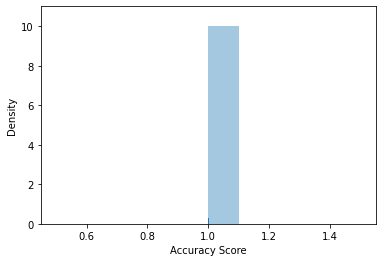

In [ ]:
sns.distplot(loocv_df['Accuracy Score'], rug=True, bins=10)

In [ ]:
sns.distplot(loocv_df['F1 Score'], rug=True,bins=20)

In [ ]:
import pickle
filename = 'final_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
X_test

array([[ 2.34375e-01, -4.84375e-01,  8.28125e-01, ..., -9.86200e+01,
         3.44300e+01,  0.00000e+00],
       [-3.43750e-01, -7.96875e-01,  4.37500e-01, ...,  5.17100e+01,
         3.27100e+01,  0.00000e+00],
       [-9.68750e-01,  7.81250e-02, -2.50000e-01, ...,  1.87800e+01,
         3.07500e+01,  0.00000e+00],
       ...,
       [-5.46875e-01,  2.50000e-01,  8.12500e-01, ...,  9.40000e+00,
         3.31800e+01,  0.00000e+00],
       [-4.21875e-01, -7.81250e-02,  9.21875e-01, ..., -3.24800e+01,
         3.49700e+01,  0.00000e+00],
       [-5.00000e-01,  7.03125e-01,  6.87500e-01, ...,  9.01300e+01,
         3.07500e+01,  5.75493e+00]])